In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array, img_to_array
#Keras is a high-level, deep learning API developed by Google for implementing neural networks. 
import keras
from skimage import io # an open source Python package designed for image preprocessing
import os
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint , EarlyStopping
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns #a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python

In [3]:
import pandas as pd
import numpy as np
import os
import collections
import cv2
from sklearn.model_selection import train_test_split

In [3]:
import sklearn, keras, skimage, cv2, collections, seaborn

print(seaborn.__version__)

print(sklearn.__version__)

print(skimage.__version__)

print(cv2.__version__)

print(keras.__version__)

0.12.2
1.1.1
0.19.3
4.7.0
2.12.0


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [7]:
image_directory = 'D:\Osteoporosis Project\ResNet\data\\normal'
SIZE = 256 #size nicchi 256x256
my_images = os.listdir(image_directory)
i = 0
img_list = []
for i, image_name in enumerate(my_images) :
  i = i+1;
  if i > 10: #first 9ta image list e append and then print
    break
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  img_list.append(img);

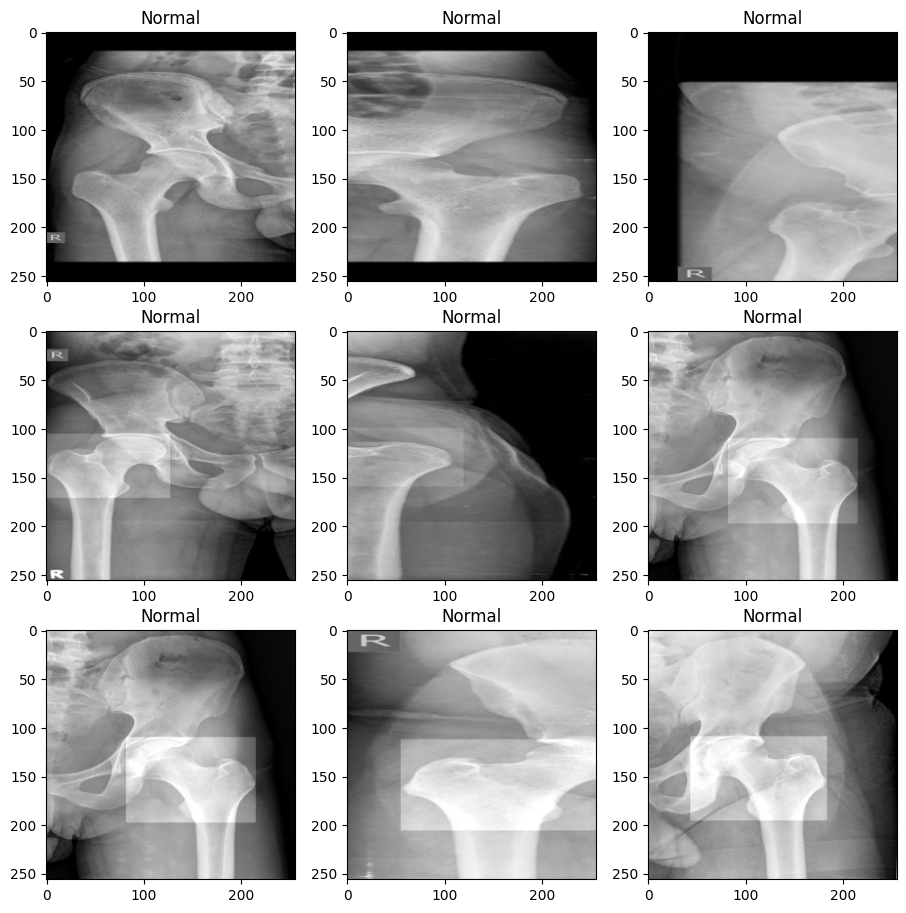

In [8]:
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.title('Normal')
  plt.imshow(img_list[i-1])

In [9]:
image_directory = 'D:\Osteoporosis Project\ResNet\data\\osteo'
SIZE = 256
my_images = os.listdir(image_directory)
i = 0
img_list = []
for i, image_name in enumerate(my_images) :
  i = i+1;
  if i > 10:
    break
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  img_list.append(img);

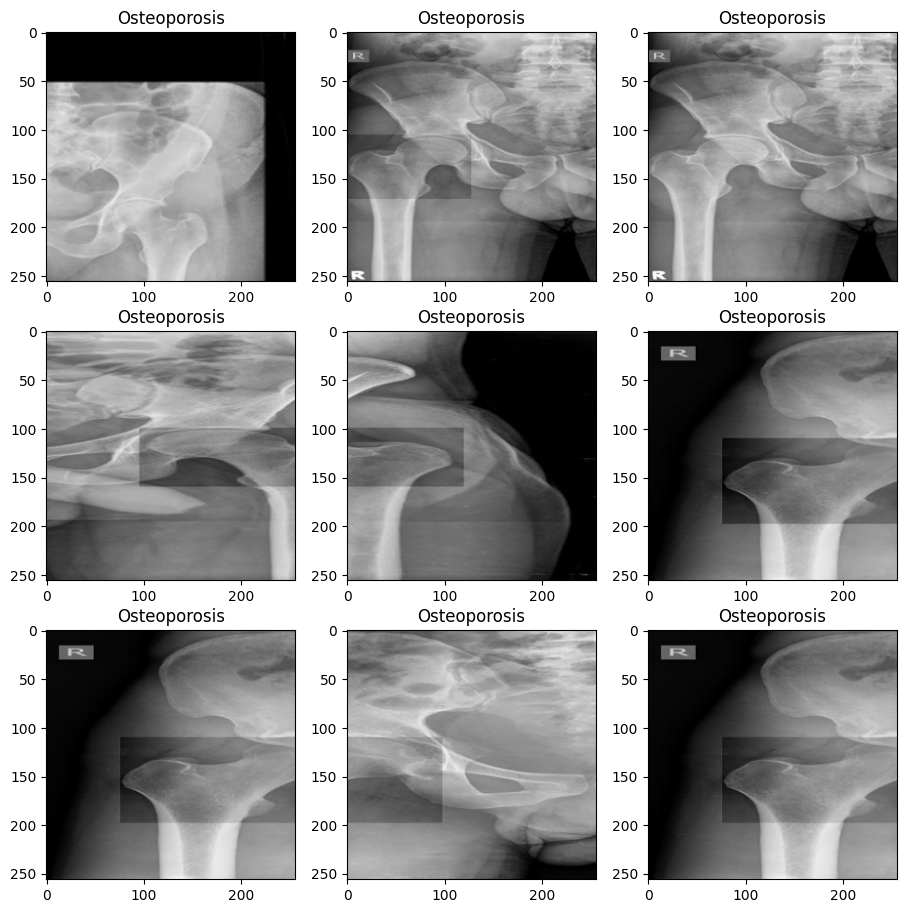

In [10]:
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.title('Osteoporosis')
  plt.imshow(img_list[i-1])

In [11]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil  #comes under Python's standard utility modules. This module helps in automating the process of copying and removal of files and directories
import glob

In [13]:
#data augmentation prottek chobir jonno  3ta kore augment
train_datagen = ImageDataGenerator(featurewise_center= True , 
                                  rotation_range= 0.4, 
                                  width_shift_range= 0.3, 
                                  height_shift_range= 0.02,
                                  horizontal_flip= True, 
                                  preprocessing_function= preprocess_input, 
                                  zoom_range= 0.4, 
                                  shear_range= 0.4 )

%cd 'D:\Osteoporosis Project\ResNet\data_aug\\normal'
!del "./*png"
## Negative Augmentation
image_directory = r'D:\Osteoporosis Project\ResNet\data\\normal'
SIZE = 256
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  dataset = []
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  x = img_to_array(img)
  x = x.reshape((1,)+x.shape)
    #print(x.shape)
    #image = io.imread(image_directory +'/'+ image_name)        
    #image = Image.fromarray(image, 'RGB')        
    #image = image.resize((SIZE,SIZE)) 
    #dataset.append(np.array(image))
    #x = np.array(dataset)
  i = 0
    #print(image_name)
  for batch in train_datagen.flow(x, batch_size=1,
                                save_to_dir='D:\Osteoporosis Project\ResNet\data_aug\\normal',
                                save_prefix= 'Aug',
                                save_format='png'):
    i += 1
    if i > 2:
      break

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'D:\\Osteoporosis Project\\ResNet\\data_aug\\\\normal'"
D:\Osteoporosis Project\ResNet


Could Not Find D:\Osteoporosis Project\ResNet\./*png


In [14]:
%cd 'D:\Osteoporosis Project\ResNet\data_aug\\osteo'
!del "./*png"
## Positive augmentation
image_directory = 'D:\Osteoporosis Project\ResNet\data\\osteo'
SIZE = 256
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  dataset = []
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  x = img_to_array(img)
  x = x.reshape((1,)+x.shape)
    #print(x.shape)
    #image = io.imread(image_directory +'/'+ image_name)        
    #image = Image.fromarray(image, 'RGB')        
    #image = image.resize((SIZE,SIZE)) 
    #dataset.append(np.array(image))
    #x = np.array(dataset)
  i = 0
    #print(image_name)
  for batch in train_datagen.flow(x, batch_size=1,
                                save_to_dir='D:\Osteoporosis Project\ResNet\data_aug\\osteo',
                                save_prefix= 'Aug',
                                save_format='png'):
    i += 1
    if i > 2:
      break

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'D:\\Osteoporosis Project\\ResNet\\data_aug\\\\osteo'"
D:\Osteoporosis Project\ResNet


Could Not Find D:\Osteoporosis Project\ResNet\./*png


In [17]:
#augmented to create the dataset
train_datagen = ImageDataGenerator(featurewise_center= True , 
                                  rotation_range= 0.4, 
                                  width_shift_range= 0.3, 
                                  horizontal_flip= True, 
                                  preprocessing_function= preprocess_input,#of inception v3 
                                  zoom_range= 0.4, 
                                  shear_range= 0.4 )

train_data = train_datagen.flow_from_directory(directory= "D:\Osteoporosis Project\ResNet\data_aug",
                                               target_size=(256,256),
                                               batch_size= 32)

Found 301 images belonging to 2 classes.


In [18]:
train_data.class_indices #classification of the images

{'normal': 0, 'osteo': 1}

In [19]:
t_img , label = train_data.next() #works as an iterator of the dataset to visualize it, t_img amra dataset er augmented values

In [20]:
t_img

array([[[[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297],
         [ 0.48235297,  0.48235297,  0.48235297]],

        ...,

        [[-1.        , -1.        , -1

In [21]:
def plotImages(img_arr , label): # 
  """
  input : image array
  output : plot images
  """

  for idx , img in enumerate( img_arr ):

    if idx<=10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


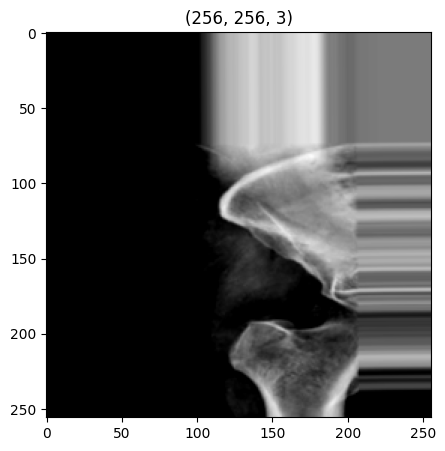

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


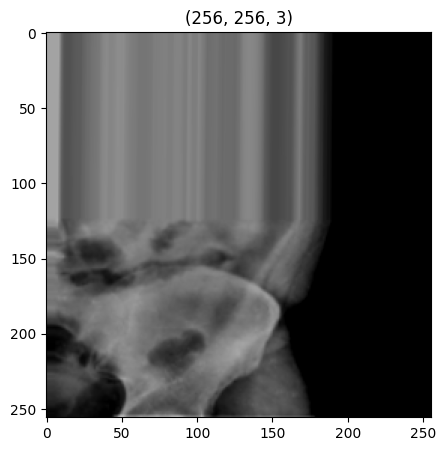

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


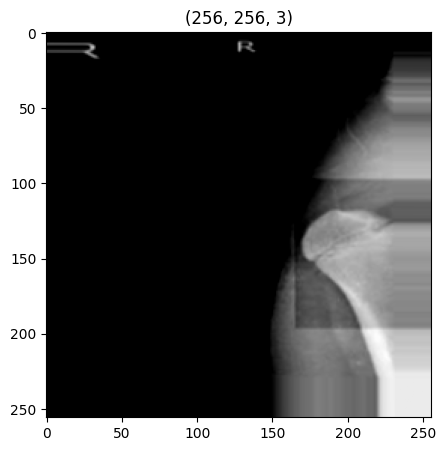

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


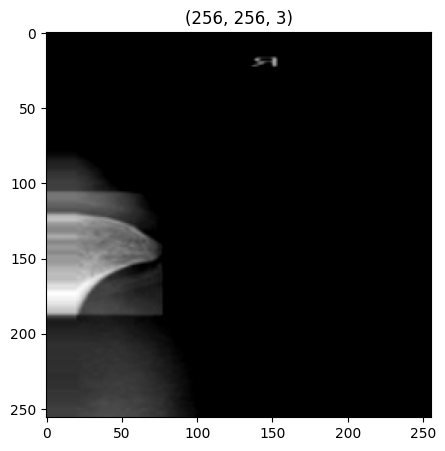

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


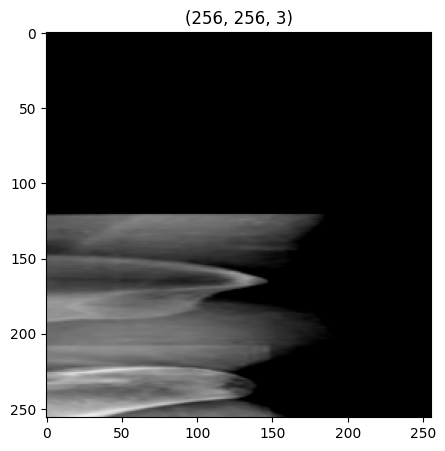

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


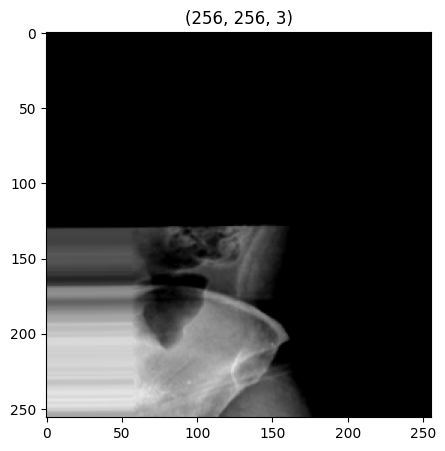

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


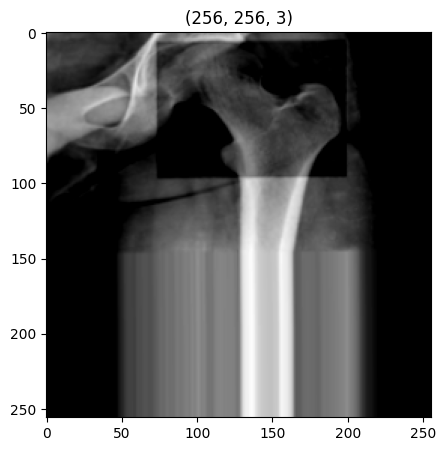

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


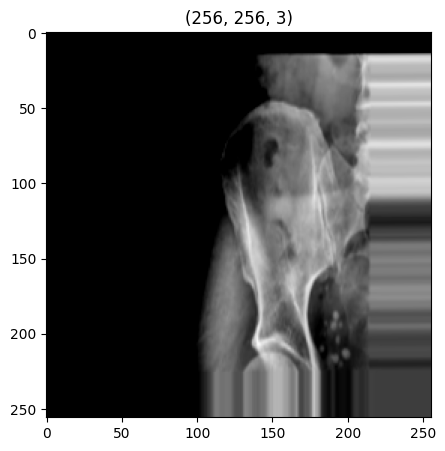

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


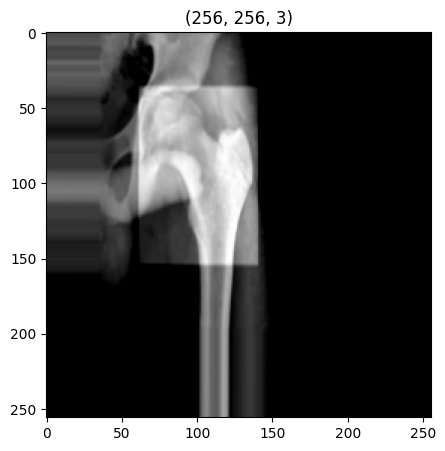

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


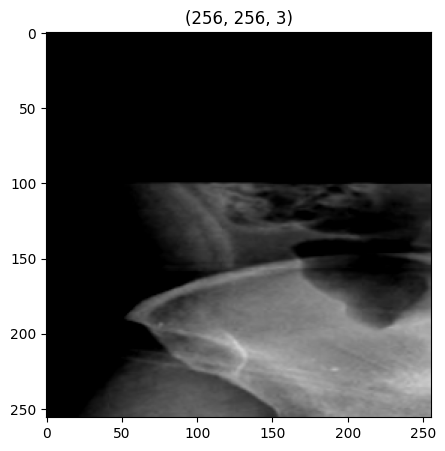

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


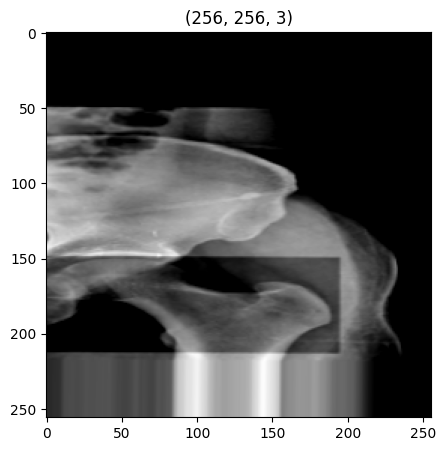

In [22]:
plotImages(t_img, label) #augmeneted images

In [23]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False) 

In [24]:
for layer in base_model.layers:
  layer.trainable = False

In [25]:
# Precision = TruePositives/ (TruePositives + FalsePostivives)

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [26]:
#output ta flatten then dense kortesi
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

#Final Model
model = Model(base_model.input , X)

#Compile the model nicher eigula parameter
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy',precision_m])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 14, 14, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 14, 14, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 14, 14, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 14, 14, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 14, 14, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 14, 14, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 14, 14, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 6, 6, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 6, 6, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 6, 6, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [27]:
#model checkpoint hocche callback jeta saves the model after every epoch
mc = ModelCheckpoint(filepath= "./best_model.h5" ,
                     monitor="accuracy",
                     verbose=1,
                     save_best_only= True )
#a callback earlystopping overfitting jate na hoy model ta jeno stop kore ekta certain accuracy te
es = EarlyStopping(monitor= "accuracy",
                   min_delta= 0.01,#min accuracy difference
                   patience= 5,#5 epoch porjonto at least
                   verbose= 1)

cb= [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          epochs=35,
                          callbacks= cb)

Epoch 1/35
10/10 [==============================] - ETA: 0s - loss: 4.4062 - accuracy: 0.5382 - precision_m: 0.5320
Epoch 1: accuracy improved from -inf to 0.53821, saving model to .\best_model.h5
10/10 [==============================] - 12s 880ms/step - loss: 4.4062 - accuracy: 0.5382 - precision_m: 0.5320
Epoch 2/35
10/10 [==============================] - ETA: 0s - loss: 2.5693 - accuracy: 0.5947 - precision_m: 0.6630
Epoch 2: accuracy improved from 0.53821 to 0.59468, saving model to .\best_model.h5
10/10 [==============================] - 9s 824ms/step - loss: 2.5693 - accuracy: 0.5947 - precision_m: 0.6630
Epoch 3/35
10/10 [==============================] - ETA: 0s - loss: 1.6755 - accuracy: 0.6711 - precision_m: 0.6799
Epoch 3: accuracy improved from 0.59468 to 0.67110, saving model to .\best_model.h5
10/10 [==============================] - 9s 866ms/step - loss: 1.6755 - accuracy: 0.6711 - precision_m: 0.6799
Epoch 4/35
10/10 [==============================] - ETA: 0s - loss: 1

In [68]:
model = load_model("D:\Osteoporosis Project\ResNet\best_model_inception.h5", compile= False) #loading base model

In [69]:
model.compile()

In [70]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'precision_m'])

In [76]:
lst_pred = []
lst_actual = []
## Normal
#image_directory = '/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis'
image_directory = 'D:/Osteoporosis Project/Osteoporosis Knee X-ray/dataset_test/normal'
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  img = load_img(image_directory +'/'+ image_name)
  #img = load_img('/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis/94.JPEG')
  img = img.resize((256,256))
  i = img_to_array(img)
  i = preprocess_input(i)
  input_arr = np.array([i])
  input_arr.shape

  pred = np.argmax(model.predict(input_arr))
  lst_pred.append(pred)
  lst_actual.append(0);

## Osteoporosis
image_directory = 'D:/Osteoporosis Project/Osteoporosis Knee X-ray/dataset_test/osteoporosis'
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  img = load_img(image_directory +'/'+ image_name)
  #img = load_img('/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis/94.JPEG')
  img = img.resize((256,256))
  i = img_to_array(img)
  i = preprocess_input(i)
  input_arr = np.array([i])
  input_arr.shape
  pred = np.argmax(model.predict(input_arr))
  lst_pred.append(pred)
  lst_actual.append(1);

y_pred = np.array(lst_pred)
y_actual = np.array(lst_actual)

1/1 [==============================] - 0s 84ms/step


In [77]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [78]:
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
conf_matrix = confusion_matrix(y_actual,y_pred) 
conf_matrix

array([[18,  0],
       [ 9,  9]], dtype=int64)

In [81]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

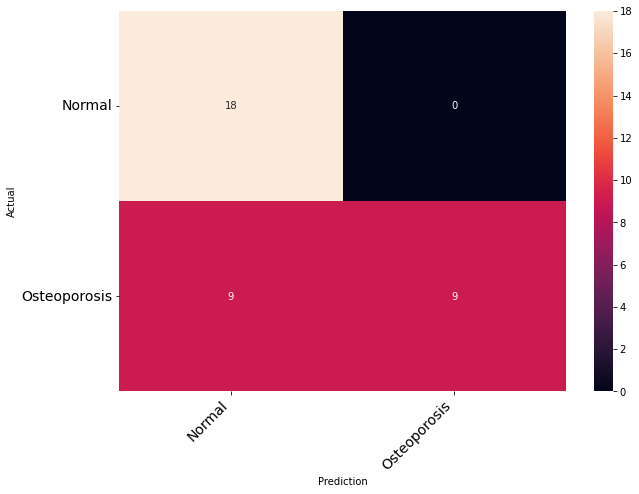

In [82]:
cm = confusion_matrix(y_actual,y_pred)
print_confusion_matrix(cm,["Normal","Osteoporosis"])

In [80]:
accuracy = accuracy_score(y_actual, y_pred)
print('Accuracy: %.3f' % accuracy)
precision = precision_score(y_actual, y_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_actual, y_pred, average='binary')
print('Recall: %.3f' % recall)
score = f1_score(y_actual, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 0.750
Precision: 1.000
Recall: 0.500
F-Measure: 0.667
